In [1]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

from urllib.request import urlopen
import urllib

from tqdm import tqdm

from selenium import webdriver
import openpyxl
import time
import math
from collections import Counter

import matplotlib.pyplot as plt

from konlpy.utils import pprint
from konlpy.tag import Twitter

In [2]:
twitter = Twitter()

C:\Users\Samsung\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
ipho_11 = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_Deep_learning_2020\data\phone\ipho_11.xlsx").drop(columns="Unnamed: 0")
ipho_12 = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_Deep_learning_2020\data\phone\ipho_12.xlsx").drop(columns="Unnamed: 0")
gla_s20 = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_Deep_learning_2020\data\phone\gla_s20.xlsx").drop(columns="Unnamed: 0")
gla_note20 = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_Deep_learning_2020\data\phone\gla_note20.xlsx").drop(columns="Unnamed: 0")

In [5]:
ipho_11.head()

,date,id,item,score,contents,liked,Cate
0,2020.12.03,전*환,"Apple 아이폰 11 6.1 디스플레이, White, 128GB",4,None,0,ipho_11
1,2020.12.03,임*성,"Apple 아이폰 11 6.1 디스플레이, Black, 256GB",5,ㅈ좋은 정보 감사합니다 대박 추천,0,ipho_11
2,2020.12.02,박*희,"Apple 아이폰 11 6.1 디스플레이, Green, 256GB",5,None,0,ipho_11
3,2020.12.02,전*희,"Apple 아이폰 11 6.1 디스플레이, Purple, 64GB",5,배송이 빠르고 할인도 좋습니다! 핸드폰도 이상없이 잘 사용 중입니다~,0,ipho_11
4,2020.12.02,S*a,"Apple 아이폰 11 6.1 디스플레이, Green, AppleCare+포함, 64GB",5,None,0,ipho_11


In [6]:
tar_ = ipho_11

len_ = [len(i) for i in tar_["contents"]]

In [9]:
Counter(len_)

Counter({4: 4394,
         18: 159,
         38: 58,
         398: 2,
         13: 152,
         76: 19,
         250: 3,
         17: 169,
         82: 28,
         104: 13,
         2: 58,
         23: 116,
         21: 136,
         366: 1,
         133: 10,
         19: 145,
         154: 10,
         3: 194,
         85: 16,
         98: 24,
         6: 163,
         195: 8,
         73: 24,
         10: 173,
         89: 19,
         20: 118,
         22: 123,
         139: 9,
         11: 201,
         14: 182,
         36: 58,
         69: 32,
         65: 38,
         249: 3,
         60: 38,
         30: 90,
         56: 44,
         106: 18,
         5: 144,
         29: 93,
         68: 24,
         8: 179,
         67: 33,
         92: 21,
         16: 149,
         24: 97,
         52: 54,
         299: 1,
         47: 61,
         1: 42,
         44: 49,
         72: 25,
         27: 97,
         25: 98,
         63: 47,
         183: 8,
         57: 40,
         49: 57,

In [19]:
print(len(ipho_11))
ipho_11["contents"].value_counts()

12384


None                                                                                                                                                                                                         4294
좋아요                                                                                                                                                                                                           119
굿                                                                                                                                                                                                              24
빠른배송 감사합니다                                                                                                                                                                                                     21
만족합니다                                                                                                                                                           

(0, 500)

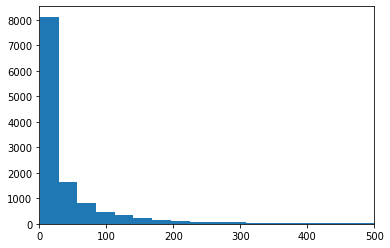

In [16]:

plt.hist(len_,bins=100)
plt.xlim([0,500])

In [3]:
path = r"C:\Users\Samsung\jupyter\Project_Deep_learning_2020\data\ear_phone\{}.xlsx"

In [4]:
air = pd.read_excel(path.format("air")).drop(columns="Unnamed: 0")
air_pro = pd.read_excel(path.format("air_pro")).drop(columns="Unnamed: 0")
buzz = pd.read_excel(path.format("buzz")).drop(columns="Unnamed: 0")

### Missing value 값

In [26]:
air["contents"].value_counts()

None                                                                                                                                                        32095
좋아요                                                                                                                                                           889
굿                                                                                                                                                             310
좋아용                                                                                                                                                           162
굳                                                                                                                                                             117
                                                                                                                                                            ...  
정말 좋습니다\n근데 정품등록하려고하니까 겁나안돼서

1. 정의
(상품특징: 디자인, 음질, 착용감)
2. 

In [7]:
air_test = air.loc[0:1000,:]

In [8]:
pos = []
words = []
for i in tqdm(air_test["contents"]):
    p = twitter.pos(i)
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)

air_test["pos"] = pos
air_test["words"] = words

100%|█████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:01<00:00, 675.07it/s]
C:\Users\Samsung\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Samsung\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
air_test.head()

,date,id,item,score,contents,liked,Cate,pos,words
0,2020.12.03,이*진,"Apple 에어팟 2세대 유선 충전 모델 (블루투스 5.0), MV7N2KH/A, ...",4,None,0,air,"[(None, Alpha)]",[None]
1,2020.12.03,한*수,"Apple 에어팟 2세대 유선 충전 모델 (블루투스 5.0), MV7N2KH/A, ...",3,택배 오기 10분 전에 미친듯이 안 좋은 리뷰들 봤습니다. 결국은 뽑기라는 거 보고...,0,air,"[(택배, Noun), (오기, Noun), (10분, Number), (전, No...","[택배, 오기, 10분, 전, 에, 미친듯이, 안, 좋은, 리뷰, 들, 봤습니다, ..."
2,2020.12.03,m00m,"Apple 에어팟 2세대 유선 충전 모델 (블루투스 5.0), MV7N2KH/A, ...",5,None,0,air,"[(None, Alpha)]",[None]
3,2020.12.03,김*기,"Apple 에어팟 2세대 유선 충전 모델 (블루투스 5.0), MV7N2KH/A, ...",5,아이폰 12프로 샀는데 역시 콩나물 빠질수가 없죠.\n\n빨리 와서 좋네여,0,air,"[(아이폰, Noun), (12, Number), (프로, Noun), (샀는데, ...","[아이폰, 12, 프로, 샀는데, 역시, 콩나물, 빠질수가, 없죠, ., \n\n,..."
4,2020.12.03,전*용,"Apple 에어팟 2세대 유선 충전 모델 (블루투스 5.0), MV7N2KH/A, ...",5,좋아요,0,air,"[(좋아요, Adjective)]",[좋아요]


In [25]:
air_test["pos"][1]

[('택배', 'Noun'),
 ('오기', 'Noun'),
 ('10분', 'Number'),
 ('전', 'Noun'),
 ('에', 'Josa'),
 ('미친듯이', 'Adjective'),
 ('안', 'Noun'),
 ('좋은', 'Adjective'),
 ('리뷰', 'Noun'),
 ('들', 'Suffix'),
 ('봤습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('결국', 'Adverb'),
 ('은', 'Noun'),
 ('뽑기', 'Noun'),
 ('라는', 'Josa'),
 ('거', 'Noun'),
 ('보고', 'Noun'),
 ('엄청', 'Adverb'),
 ('긴장', 'Noun'),
 ('했는데', 'Verb'),
 ('.........', 'Punctuation'),
 ('다른', 'Noun'),
 ('건', 'Noun'),
 ('다', 'Adverb'),
 ('좋지만', 'Adjective'),
 ('두', 'Noun'),
 ('개', 'Noun'),
 ('만', 'Josa'),
 ('말씀드리고', 'Verb'),
 ('싶네요', 'Verb'),
 ('\n\n\n', 'Foreign'),
 ('1', 'Number'),
 ('.', 'Punctuation'),
 ('에어팟', 'Noun'),
 ('2', 'Number'),
 ('인데', 'Josa'),
 ('왜', 'Noun'),
 ('페어', 'Noun'),
 ('링', 'Noun'),
 ('버튼', 'Noun'),
 ('이', 'Josa'),
 ('하단', 'Noun'),
 ('에', 'Josa'),
 ('있죠', 'Adjective'),
 ('?', 'Punctuation'),
 ('에어팟', 'Noun'),
 ('2', 'Number'),
 ('충전', 'Noun'),
 ('케이스', 'Noun'),
 ('의', 'Josa'),
 ('페어', 'Noun'),
 ('링', 'Noun'),
 ('버튼', 'Noun'),
 ('은', 'Josa'

In [14]:
Counter(air_test["words"].sum()).most_common()

[('None', 597),
 ('이', 190),
 ('.', 188),
 ('\n', 164),
 ('에', 143),
 ('도', 129),
 ('잘', 109),
 ('가', 91),
 ('좋아요', 91),
 ('에어팟', 90),
 ('배송', 75),
 ('너무', 74),
 ('을', 62),
 ('제품', 61),
 ('!', 60),
 ('은', 57),
 ('는', 53),
 ('구매', 52),
 ('사용', 51),
 ('로', 47),
 ('정품', 41),
 ('에서', 40),
 ('다', 36),
 ('상품', 36),
 ('\n\n', 35),
 ('를', 34),
 ('안', 33),
 ('?', 33),
 ('빠르고', 33),
 ('것', 33),
 ('~', 33),
 ('선물', 32),
 ('으로', 32),
 ('..', 32),
 ('음질', 31),
 ('2', 30),
 ('제', 30),
 ('쿠팡', 30),
 ('거', 29),
 ('하고', 29),
 ('때', 29),
 ('진짜', 28),
 ('요', 28),
 ('...', 27),
 ('교환', 27),
 ('했는데', 25),
 ('1', 25),
 ('등록', 25),
 ('그냥', 25),
 ('세대', 25),
 ('샀는데', 23),
 ('!!', 23),
 ('새', 22),
 ('고', 22),
 ('생각', 21),
 ('아주', 21),
 ('들', 20),
 ('충전', 20),
 ('정말', 20),
 ('입니다', 20),
 ('한', 20),
 ('했어요', 19),
 ('같아요', 19),
 ('쓰고', 19),
 ('애플', 19),
 ('2019년', 18),
 ('했습니다', 18),
 ('좀', 18),
 ('케이스', 17),
 ('의', 17),
 ('역시', 17),
 (',', 17),
 ('처음', 17),
 ('가격', 17),
 ('조금', 17),
 ('연결', 17),
 ('소리', 17),
 ('

In [19]:
air["score"].value_counts().sort_index()

0        5
1     1334
2      499
3     1831
4     7282
5    59195
Name: score, dtype: int64

In [20]:
air_pro["score"].value_counts().sort_index()

0        5
1      705
2      236
3      810
4     3138
5    33695
Name: score, dtype: int64

In [21]:
buzz["score"].value_counts().sort_index()

1      680
2      195
3      551
4     2284
5    17444
Name: score, dtype: int64